In [489]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from plotnine import *
from mizani.formatters import currency_format
from babel.numbers import format_currency, format_percent
import math
pd.set_option('mode.chained_assignment', None)

In [467]:
base_folder = 'C:\\Users\\karim\\Documents\\westgate\\data\\'

In [468]:
loans_requests_2022_2023_df = pd.read_csv(base_folder + 'loans_disbursed_if_2022_2023.csv')

In [469]:
loans_requests_2024_df = pd.read_csv(base_folder + 'loans_disbursed_if_2024.csv')

In [470]:
loans_requests_df = pd.concat([loans_requests_2022_2023_df, loans_requests_2024_df])

In [ ]:
loans_requests_df.columns

In [ ]:
print(loans_requests_df[loans_requests_df['Loan #']=='IF1717183'].to_dict(orient='list'))

In [471]:
loans_requests_df['release_date'] = pd.to_datetime(loans_requests_df['Released Date'])

In [472]:
loans_requests_df['release_year'] = loans_requests_df['release_date'].dt.year
loans_requests_df['release_month'] = loans_requests_df['release_date'].dt.month
loans_requests_df['release_day'] = loans_requests_df['release_date'].dt.day

In [ ]:
loans_requests_df['release_year'] .value_counts()

In [ ]:
#loans_requests_2022_df = loans_requests_df[loans_requests_df['release_year']==2022]

In [473]:
not_disbursed = ['Not Taken Up', 'Denied']

loans_disbursed_df = loans_requests_df[~loans_requests_df['Loan Status Name'].isin(not_disbursed)]

In [474]:
repayments_2022_df = pd.read_csv(base_folder + 'repayments_if_2022.csv')
repayments_2023_df = pd.read_csv(base_folder + 'repayments_if_2023.csv')
repayments_2024_df = pd.read_csv(base_folder + 'repayments_if_2024.csv')

In [475]:
repayments_df = pd.concat([repayments_2022_df, repayments_2023_df, repayments_2024_df])
repayments_df['collection_date'] = pd.to_datetime(repayments_df['Collection Date'])
repayments_df['collection_year'] = repayments_df['collection_date'].dt.year
repayments_df['collection_month'] = repayments_df['collection_date'].dt.month

In [476]:
loans_main_cols = ['Loan #', 'Loan Id', 'Released Date', 'release_date', 
                    'release_year', 'release_month', 'Principal Amount', 
                    'Loan Status Name', 'Total Due Amount', 'Pending Due']

In [ ]:
repayments_df.columns

In [ ]:
repayments_df

In [ ]:
repayment_main_cols = ['Loan #', 'Loan Id', 'Collection Date', 
                        'collection_date', 'Total Paid Amount']

In [ ]:
# loans_copy = loans_disbursed_df[['Loan #', 'Loan Id', 'Released Date', 'Principal Amount']]
# loans_copy.rename(columns = {'Released Date': 'Collection Date', 
#                             'Principal Amount': 'Total Paid Amount'},
#                     inplace=True)
# loans_copy['collection_date'] = pd.to_datetime(loans_copy['Collection Date'])
# loans_copy['Total Paid Amount'] = -loans_copy['Total Paid Amount']

In [ ]:
#repayments_with_origination_df = pd.concat([repayments_df, loans_copy])

In [477]:
merged_df = loans_disbursed_df[loans_main_cols].merge(
    repayments_df.rename(columns={'Loan #': 'Loan # Repayment'}),
    how='left', 
    left_on='Loan Id',
    right_on='Loan Id'
)

In [478]:
merged_df['days_since_release'] = (merged_df['collection_date'] - merged_df['release_date']).dt.days

merged_df['weeks_since_release'] = np.floor(merged_df['days_since_release'] / 7.0)

In [ ]:
merged_df.to_csv('if_merged.csv', index=False)

In [ ]:
merged_df.sort_values(['release_year', 'release_month', 'Loan #', 'Collection Date']).head()

In [ ]:
merged_df['Loan Id'].nunique()

Q1 view

In [497]:
disbursed_df = loans_disbursed_df.groupby(['release_year', 'release_month'])['Principal Amount'].sum().reset_index()
disbursed_df

,release_year,release_month,Principal Amount
0,2022,1,326435.69
1,2022,2,279597.60
2,2022,3,272453.10
3,2022,4,334777.63
4,2022,5,435169.80
5,2022,6,333097.14
6,2022,7,344235.65
7,2022,8,470820.68
8,2022,9,383595.02
9,2022,10,293943.45


In [498]:
collected_df = merged_df.groupby(['release_year', 'release_month', 'collection_year', 'collection_month'])['Total Paid Amount'].sum().reset_index()
collected_df
# q1_view['% Principal Collected'] = q1_view['Total Paid Amount'] / q1_view['Principal Amount']
# q1_view['% Principal Collected'] = q1_view['% Principal Collected'].apply(lambda n: format_percent(n))
# q1_view['Disbursed'] = q1_view['Principal Amount'].apply(lambda n: format_currency(n, currency='CAD'))
# q1_view['Collected'] = q1_view['Total Paid Amount'].apply(lambda n: format_currency(n, currency='CAD'))
# q1_view[['Disbursed', 'Collected', '% Principal Collected']]

,release_year,release_month,collection_year,collection_month,Total Paid Amount
0,2022,1,2022.0,1.0,49903.66
1,2022,1,2022.0,2.0,121376.97
2,2022,1,2022.0,3.0,116443.66
3,2022,1,2022.0,4.0,85969.82
4,2022,1,2022.0,5.0,41264.28
...,...,...,...,...,...
399,2024,2,2024.0,2.0,73023.36
400,2024,2,2024.0,3.0,164753.28
401,2024,2,2024.0,4.0,99283.67
402,2024,3,2024.0,3.0,63213.28


In [499]:
monthly_df = collected_df.merge(disbursed_df, how='left', on=['release_year', 'release_month'])
monthly_df.to_csv('if_monthly_cashflows.csv', index=False)

Check whether the pending balances are in line (calculated by me VS stated in the loans data)

In [ ]:
check_df = merged_df.groupby('Loan #').agg({'Principal Amount': 'max',
                                            'Total Due Amount': 'max', 
                                            'Total Paid Amount':'sum',
                                            'Pending Due': 'max'})

In [ ]:
check_df['Pending Due Calculated'] = (
    check_df['Total Due Amount'] - (check_df['Total Paid Amount'] + check_df['Principal Amount'])
)

check_df

In [ ]:
# these don't balance for some reason (most likely repayments in 2024)
not_balancing = check_df[np.abs(check_df['Pending Due Calculated'] - check_df['Pending Due']) > 1]
not_balancing

In [ ]:
(not_balancing['Pending Due Calculated'] - not_balancing['Pending Due']).mean()

==> Pending balance calculation looks good enough.

Group the cashflows by `days_since_release`

In [ ]:
cashflows_weekly_df = merged_df.groupby(['release_year', 'weeks_since_release'])[['Total Paid Amount']].sum().reset_index()
cashflows_weekly_df

In [ ]:
cashflows_weekly_df['weeks_since_release'].value_counts()

In [439]:
merged_df = merged_df[merged_df['weeks_since_release'] >= 0]

In [403]:
cashflows_weekly_df = cashflows_weekly_df[cashflows_weekly_df['weeks_since_release'] >= 0]

Do 2022 first

In [ ]:
cashflows_weekly_2022_df = cashflows_weekly_df[cashflows_weekly_df['release_year']==2022]

In [ ]:
cashflows_weekly_2022_df['cumul_cashflow'] = cashflows_weekly_2022_df['Total Paid Amount'].cumsum()

In [ ]:
cashflows_weekly_2022_df.to_csv('cashflow_weekly_2022_originations.csv', index=False)

In [ ]:
# Weekly IRR
weekly_irr = npf.irr(cashflows_weekly_2022_df['Total Paid Amount'])
weekly_irr

In [ ]:
# Yearly IRR
(1+weekly_irr)**52 - 1

In [ ]:
(
    ggplot(cashflows_weekly_2022_df.query('week <= 60'))
    + aes(x='week', y='Total Paid Amount')
    + geom_bar(stat='identity')
)

In [ ]:
(
    ggplot(cashflows_weekly_2022_df.query('week <= 60'))
    + aes(x='week', y='cumul_cashflow')
    + geom_point(color='green')
    #+ geom_line()
    + ggtitle('IF loans disbursed 2022')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
)

Now do 2022 + 2023 + 2024

In [450]:
cashflows_weekly_df.to_csv('cashflows_weekly.csv', index=False)

In [ ]:
cashflows_weekly_df['release_year'].value_counts()

In [ ]:
cashflows_weekly_df['weeks_since_release'].value_counts()

In [404]:
cashflows_weekly_by_year_groups = cashflows_weekly_df.groupby('release_year')
df_list = []

for year, cashflows_weekly_year_df in cashflows_weekly_by_year_groups:

    # all_weeks_df = pd.DataFrame({'week': np.arange(0, cashflows_weekly_year_df['weeks_since_release'].max())})

    # cashflow_weekly_df = all_weeks_df.merge(cashflows_year_df, 
    #                                 left_on='week', 
    #                                 right_on='weeks_since_release', 
    #                                 how='left')

    # cashflow_weekly_df.fillna(0, inplace=True)

    cashflows_weekly_year_df['cumul_cashflow'] = cashflows_weekly_year_df['Total Paid Amount'].cumsum()

    cashflows_weekly_year_df['cumul_cashflow_normalized'] = (
        cashflows_weekly_year_df['cumul_cashflow'] 
        / abs(cashflows_weekly_year_df['cumul_cashflow'].iloc[0]) 
        * 1000000
    )

    df_list.append(cashflows_weekly_year_df)

cashflows_weekly_cumul_df = pd.concat(df_list)


In [405]:
cashflows_weekly_cumul_df['release_year'].value_counts()

release_year
2022    114
2023     66
2024     16
Name: count, dtype: int64

In [406]:
cashflows_weekly_cumul_df['weeks_since_release'].value_counts()

weeks_since_release
0.0      3
9.0      3
1.0      3
15.0     3
14.0     3
        ..
84.0     1
85.0     1
86.0     1
87.0     1
116.0    1
Name: count, Length: 114, dtype: int64

In [407]:
cashflows_weekly_cumul_df['release_year'] = cashflows_weekly_cumul_df['release_year'].astype(int).astype(str)

C:\Users\karim\Documents\Westgate\.env-flaml\lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


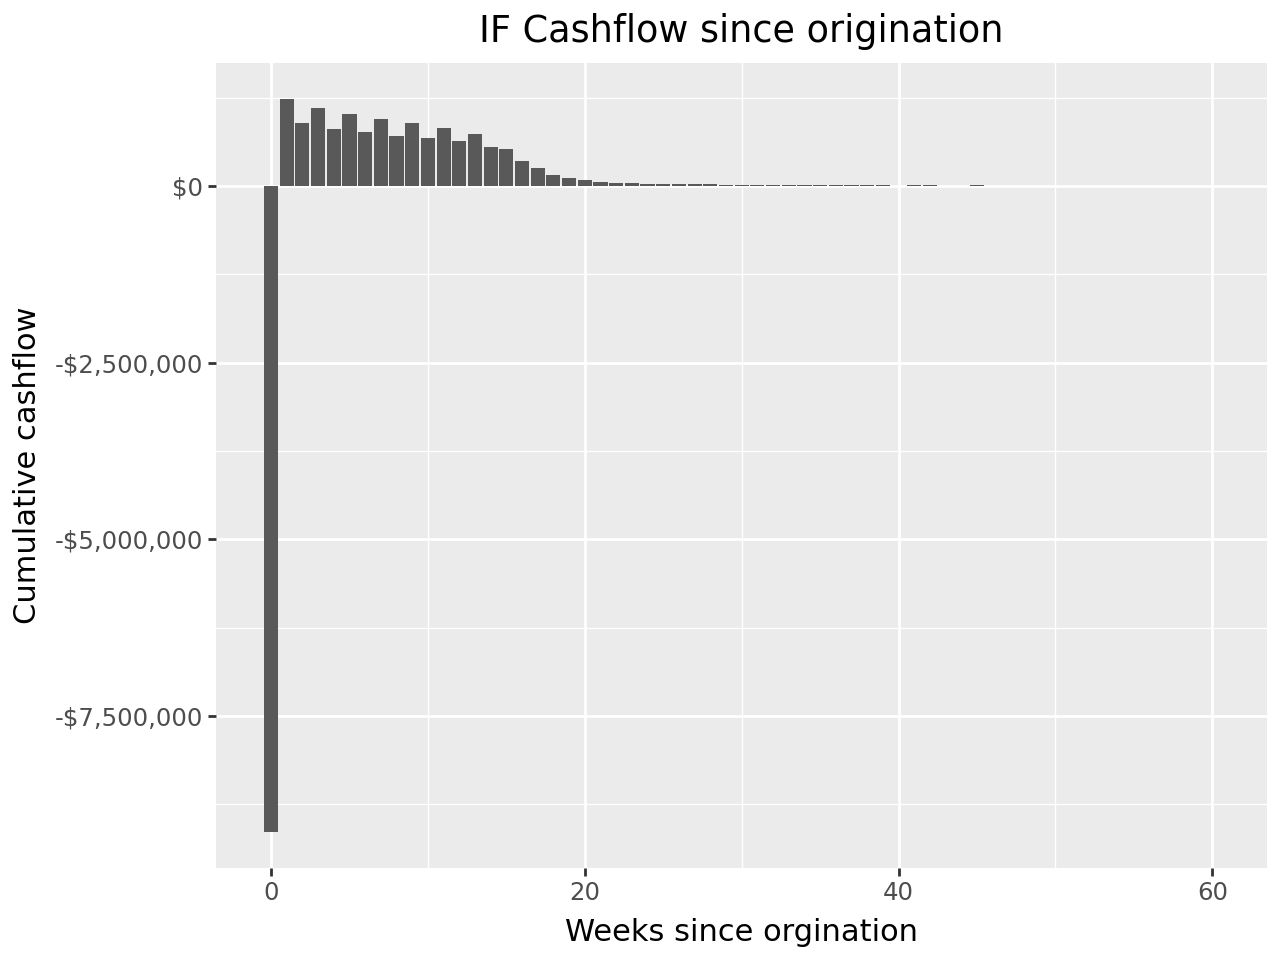

In [463]:
(
    ggplot(cashflows_weekly_cumul_df.query('(weeks_since_release <= 60) & (release_year < "2024")'))
    + aes(x='weeks_since_release', y='Total Paid Amount')
    + geom_bar(stat='identity')
    + ggtitle('IF Cashflow since origination')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)

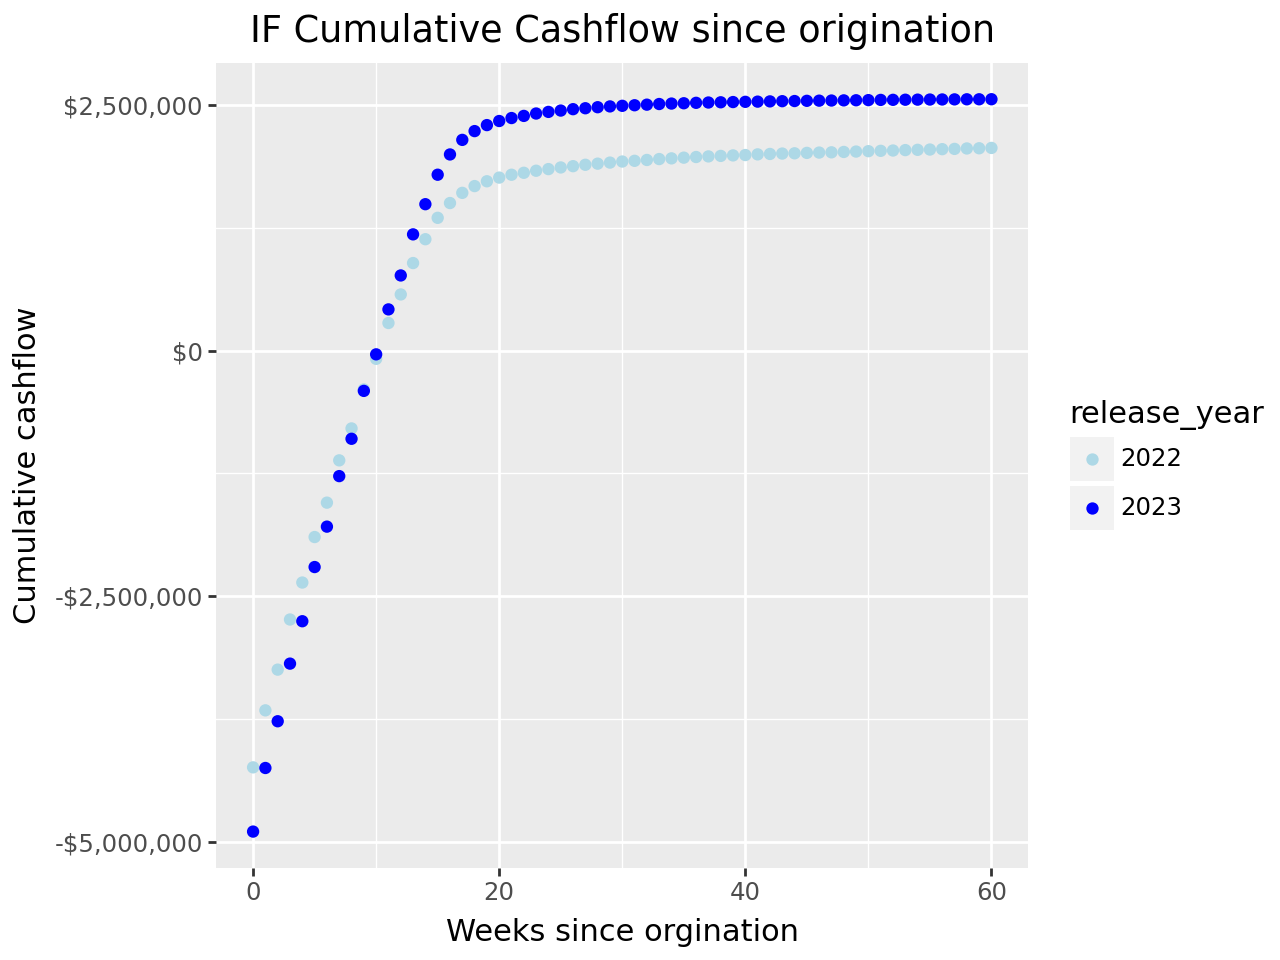

In [464]:
(
    ggplot(cashflows_weekly_cumul_df.query('(weeks_since_release <= 60) & (release_year < "2024")'))
    + aes(x='weeks_since_release', y='cumul_cashflow')
    + geom_point(aes(group='release_year', color='release_year'))
    #+ geom_line()
    + ggtitle('IF Cumulative Cashflow since origination')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)

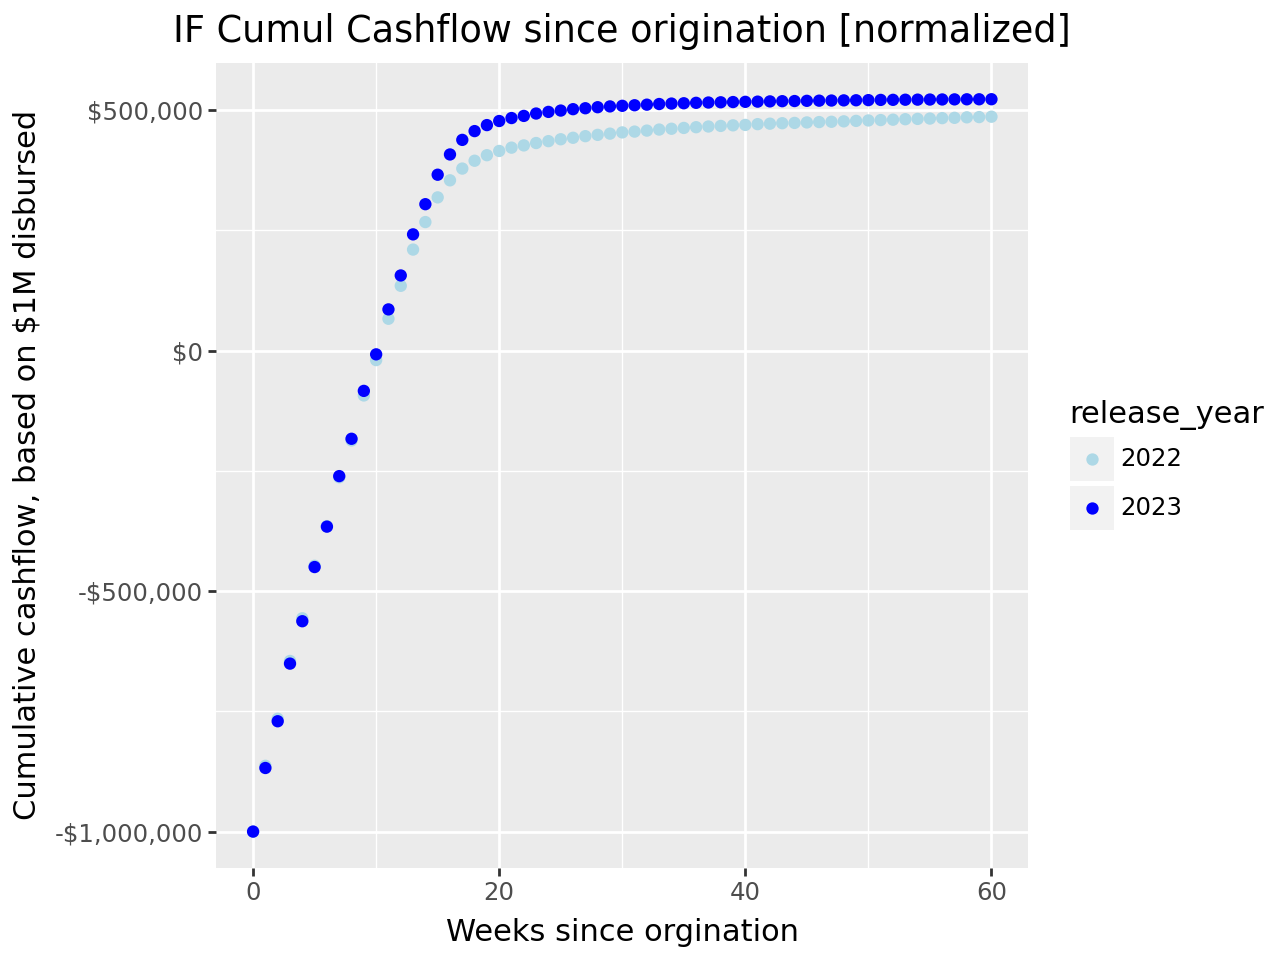

In [465]:
(
    ggplot(cashflows_weekly_cumul_df.query('(weeks_since_release <= 60) & (release_year < "2024")'))
    + aes(x='weeks_since_release', y='cumul_cashflow_normalized')
    + geom_point(aes(group='release_year', color='release_year'))
    #+ geom_line(aes(group='release_year', color='release_year'))
    + ggtitle('IF Cumul Cashflow since origination [normalized]')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow, based on $1M disbursed')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)

Compare 2024 to 2023 and 2022 using same cut-off as 2024

In [440]:
merged_df['release_day'] = merged_df['release_date'].dt.day

In [441]:
merged_df['collection_year'] = merged_df['collection_date'].dt.year
merged_df['collection_month'] = merged_df['collection_date'].dt.month
merged_df['collection_day'] = merged_df['collection_date'].dt.day

In [443]:
cutoff_weeks = merged_df[merged_df['release_year']==2024]['weeks_since_release'].max()
cutoff_weeks

15.0

In [451]:
merged_filtered_df = merged_df[
    (merged_df['weeks_since_release'] <= cutoff_weeks)
    & (merged_df['release_month'] <= 3)
]
    
cashflows_filtered_df = merged_filtered_df.groupby(['release_year', 'weeks_since_release'])[['Total Paid Amount']].sum().reset_index()
cashflows_filtered_df['release_year'].value_counts()

release_year
2022    16
2023    16
2024    16
Name: count, dtype: int64

In [457]:
merged_filtered_df['release_month'].value_counts()

release_month
1    19774
2    17591
3    15107
Name: count, dtype: int64

In [458]:
cashflows_filtered_by_year_groups = cashflows_filtered_df.groupby('release_year')
df_list = []

for year, cashflows_year_df in cashflows_filtered_by_year_groups:

    cashflows_year_df['cumul_cashflow'] = cashflows_year_df['Total Paid Amount'].cumsum()

    cashflows_year_df['cumul_cashflow_normalized'] = (
        cashflows_year_df['cumul_cashflow'] 
        / abs(cashflows_year_df['cumul_cashflow'].iloc[0]) 
        * 1000000
    )

    df_list.append(cashflows_year_df)

cashflows_weekly_filtered_cumul_df = pd.concat(df_list)


In [459]:
cashflows_weekly_filtered_cumul_df['release_year'] = cashflows_weekly_filtered_cumul_df['release_year'].astype(int).astype(str)

In [460]:
cashflows_weekly_filtered_cumul_df['release_year'].value_counts()

release_year
2022    16
2023    16
2024    16
Name: count, dtype: int64

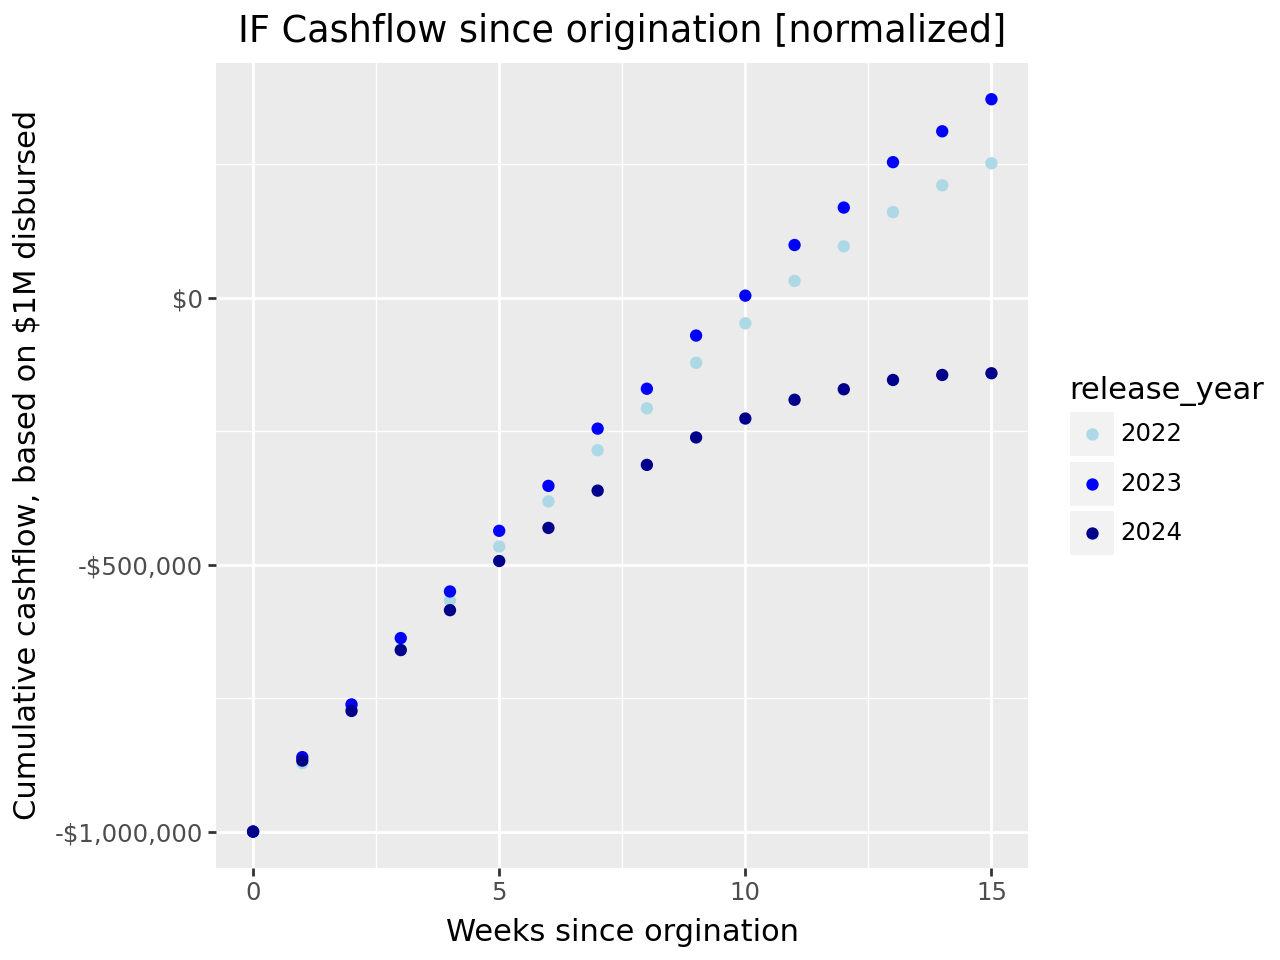

In [461]:
(
    ggplot(cashflows_weekly_filtered_cumul_df.query('weeks_since_release <= 60'))
    + aes(x='weeks_since_release', y='cumul_cashflow_normalized')
    + geom_point(aes(group='release_year', color='release_year'))
    #+ geom_line(aes(group='release_year', color='release_year'))
    + ggtitle('IF Cashflow since origination [normalized]')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow, based on $1M disbursed')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)